In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"


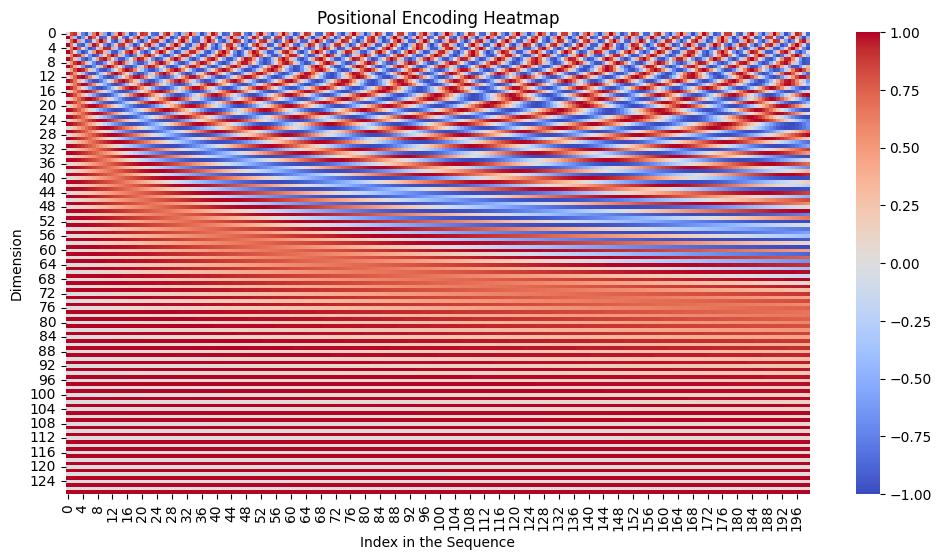

In [2]:
import torch
import math
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn as nn

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super().__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1).float()
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))

        pe[:, 0::2] = torch.sin(position * div_term)  # even
        pe[:, 1::2] = torch.cos(position * div_term)  # odd

        pe = pe.unsqueeze(0)  # shape: [1, max_len, d_model]
        self.register_buffer('pe', pe)

    def forward(self, x):
        return x + self.pe[:, :x.size(1)]

# Parameters for visualization
d_model = 128  # Dimensionality of the model
max_len = 200  # Maximum sequence length

# Instantiate the PositionalEncoding class
pos_enc = PositionalEncoding(d_model=d_model, max_len=max_len)

# Extract the positional encoding matrix
pe_matrix = pos_enc.pe.squeeze(0).numpy()  # Shape: [max_len, d_model]

# Plotting the positional encoding heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pe_matrix.T, cmap="coolwarm", cbar=True)
plt.title("Positional Encoding Heatmap")
plt.xlabel("Index in the Sequence")
plt.ylabel("Dimension")
plt.show()
